# Epigenomics Assignment (Histone ChIP-Sequencing)
# Dennis Dharmawan - r0911921

### Title
ChIP-seq profile of iPSC-derived human developmental cortical interneurons (**GEO accession: GSE186738**)
### Organism
*Homo sapiens*
### Summary
This ChIP-seq experiment was carried out to see the role of schizophrenia (SCZ) GWAS loci in regulating gene expression levels, particularly the ATP2A2 gene, which was discovered to have lower expression in cortical interneurons. SNP rs4766428, which is an intron variant in ATP2A2, has been found to have an almost perfect probability to be causal, so the authors analyzed enhancer markers around this SNP, which are histone modifications H3K4me1 and H3K27Ac. They found that H3K4me1 and H3K27Ac peaks overlap each other near the SNP site.

In this notebook, I am going to do ChIP-seq analysis for H3K4me1 between iPSC-derived healthy control and schizophrenia cortical interneurons.  
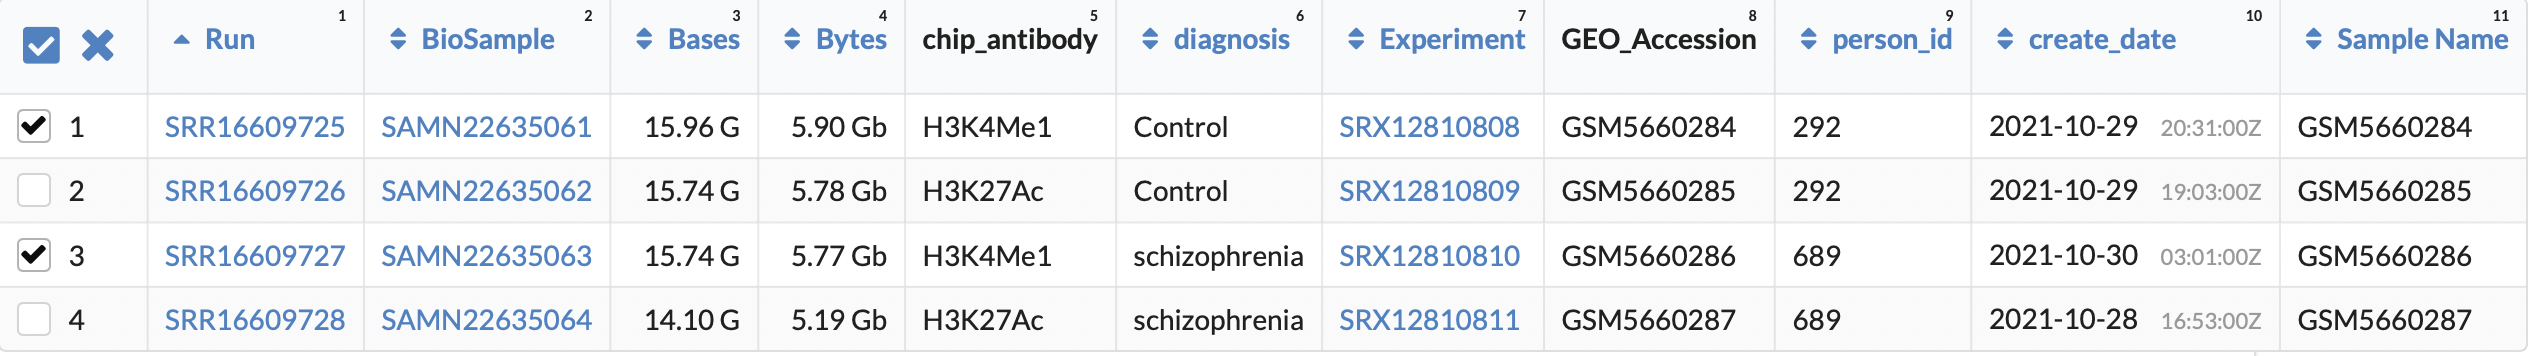
### Reference where the data set came from
Liu D, Zinski A, Mishra A, Noh H et al. **Impact of schizophrenia GWAS loci converge onto distinct pathways in cortical interneurons vs glutamatergic neurons during development.** Mol Psychiatry 2022 Oct;27(10):4218-4233. 

# Step 0: Set up working directory

In [2]:
mkdir -p epigenomics_assignment
cd epigenomics_assignment

# Step 1: Get reads

The cortical interneurons (cINs) were treated with anti-H3K4me1, which is an antibody for mono-methylation of the 4th lysine residue of histone H3.

**FASTQ files:**  
**SRR16609725 --> control cells treated with anti-H3K4me1  
SRR16609727 --> schizophrenia cells treated with anti-H3K4me1**

In [3]:
vdb-config -s /repository/user/cache-disabled=true

**Download all reads:**

In [15]:
mkdir fastq_files_control

In [ ]:
# Download control reads
fastq-dump \
    SRR16609725 \
    --split-files \
    --outdir fastq_files_control \
    --verbose

Preference setting is: Prefer SRA Normalized Format files with full base quality scores if available.
SRR16609725 is an SRA Normalized Format file with full base quality scores.


In [11]:
mkdir fastq_files_SCZ

In [13]:
# Download schizophrenia reads
time fastq-dump \
    SRR16609727 \
    --gzip \
    --split-files \
    --outdir fastq_files_SCZ \
    --verbose

Preference setting is: Prefer SRA Normalized Format files with full base quality scores if available.
SRR16609727 is an SRA Normalized Format file with full base quality scores.
Read 104253914 spots for SRR16609727
Written 104253914 spots for SRR16609727

real	145m39.549s
user	100m16.036s
sys	1m5.834s


In [12]:
ls -l

total 0
drwxr-xr-x 2 r0911921 domain users  78 Dec 26 19:08 fastq_files_control
drwxr-xr-x 2 r0911921 domain users  10 Dec 26 19:09 fastq_files_SCZ
drwxr-xr-x 2 r0911921 domain users 258 Dec 26 15:33 fastq_files_test


No of reads:
- SRR16609725 (control): 105,738,355 reads
- SRR16609727 (schizophrenia): 104,253,914 reads

In [9]:
zcat SRR16609725_1.fastq.gz | wc -l

422953420


In [19]:
zcat SRR16609727_1.fastq.gz | wc -l

417015656


**Check read quality:**

In [22]:
cd fastq_files_control

In [ ]:
fastqc SRR16609725_1.fastq.gz

Started analysis of SRR16609725_1.fastq.gz
Approx 5% complete for SRR16609725_1.fastq.gz
Approx 10% complete for SRR16609725_1.fastq.gz
Approx 15% complete for SRR16609725_1.fastq.gz
Approx 20% complete for SRR16609725_1.fastq.gz
Approx 25% complete for SRR16609725_1.fastq.gz
Approx 30% complete for SRR16609725_1.fastq.gz
Approx 35% complete for SRR16609725_1.fastq.gz
Approx 40% complete for SRR16609725_1.fastq.gz


In [ ]:
fastqc SRR16609725_2.fastq.gz

Started analysis of SRR16609725_2.fastq.gz
Approx 5% complete for SRR16609725_2.fastq.gz
Approx 10% complete for SRR16609725_2.fastq.gz
Approx 15% complete for SRR16609725_2.fastq.gz
Approx 20% complete for SRR16609725_2.fastq.gz


In [ ]:
fastqc SRR16609727_1.fastq.gz

Started analysis of SRR16609727_1.fastq.gz
Approx 5% complete for SRR16609727_1.fastq.gz
Approx 10% complete for SRR16609727_1.fastq.gz
Approx 15% complete for SRR16609727_1.fastq.gz
Approx 20% complete for SRR16609727_1.fastq.gz
Approx 25% complete for SRR16609727_1.fastq.gz


In [ ]:
fastqc SRR16609727_2.fastq.gz

Started analysis of SRR16609727_2.fastq.gz
Approx 5% complete for SRR16609727_2.fastq.gz
Approx 10% complete for SRR16609727_2.fastq.gz
Approx 15% complete for SRR16609727_2.fastq.gz
Approx 20% complete for SRR16609727_2.fastq.gz
Approx 25% complete for SRR16609727_2.fastq.gz
Approx 30% complete for SRR16609727_2.fastq.gz
Approx 35% complete for SRR16609727_2.fastq.gz
Approx 40% complete for SRR16609727_2.fastq.gz
Approx 45% complete for SRR16609727_2.fastq.gz
Approx 50% complete for SRR16609727_2.fastq.gz
Approx 55% complete for SRR16609727_2.fastq.gz
Approx 60% complete for SRR16609727_2.fastq.gz
Approx 65% complete for SRR16609727_2.fastq.gz


**Per base sequence quality for SRR16609725_1.fastq.gz:**
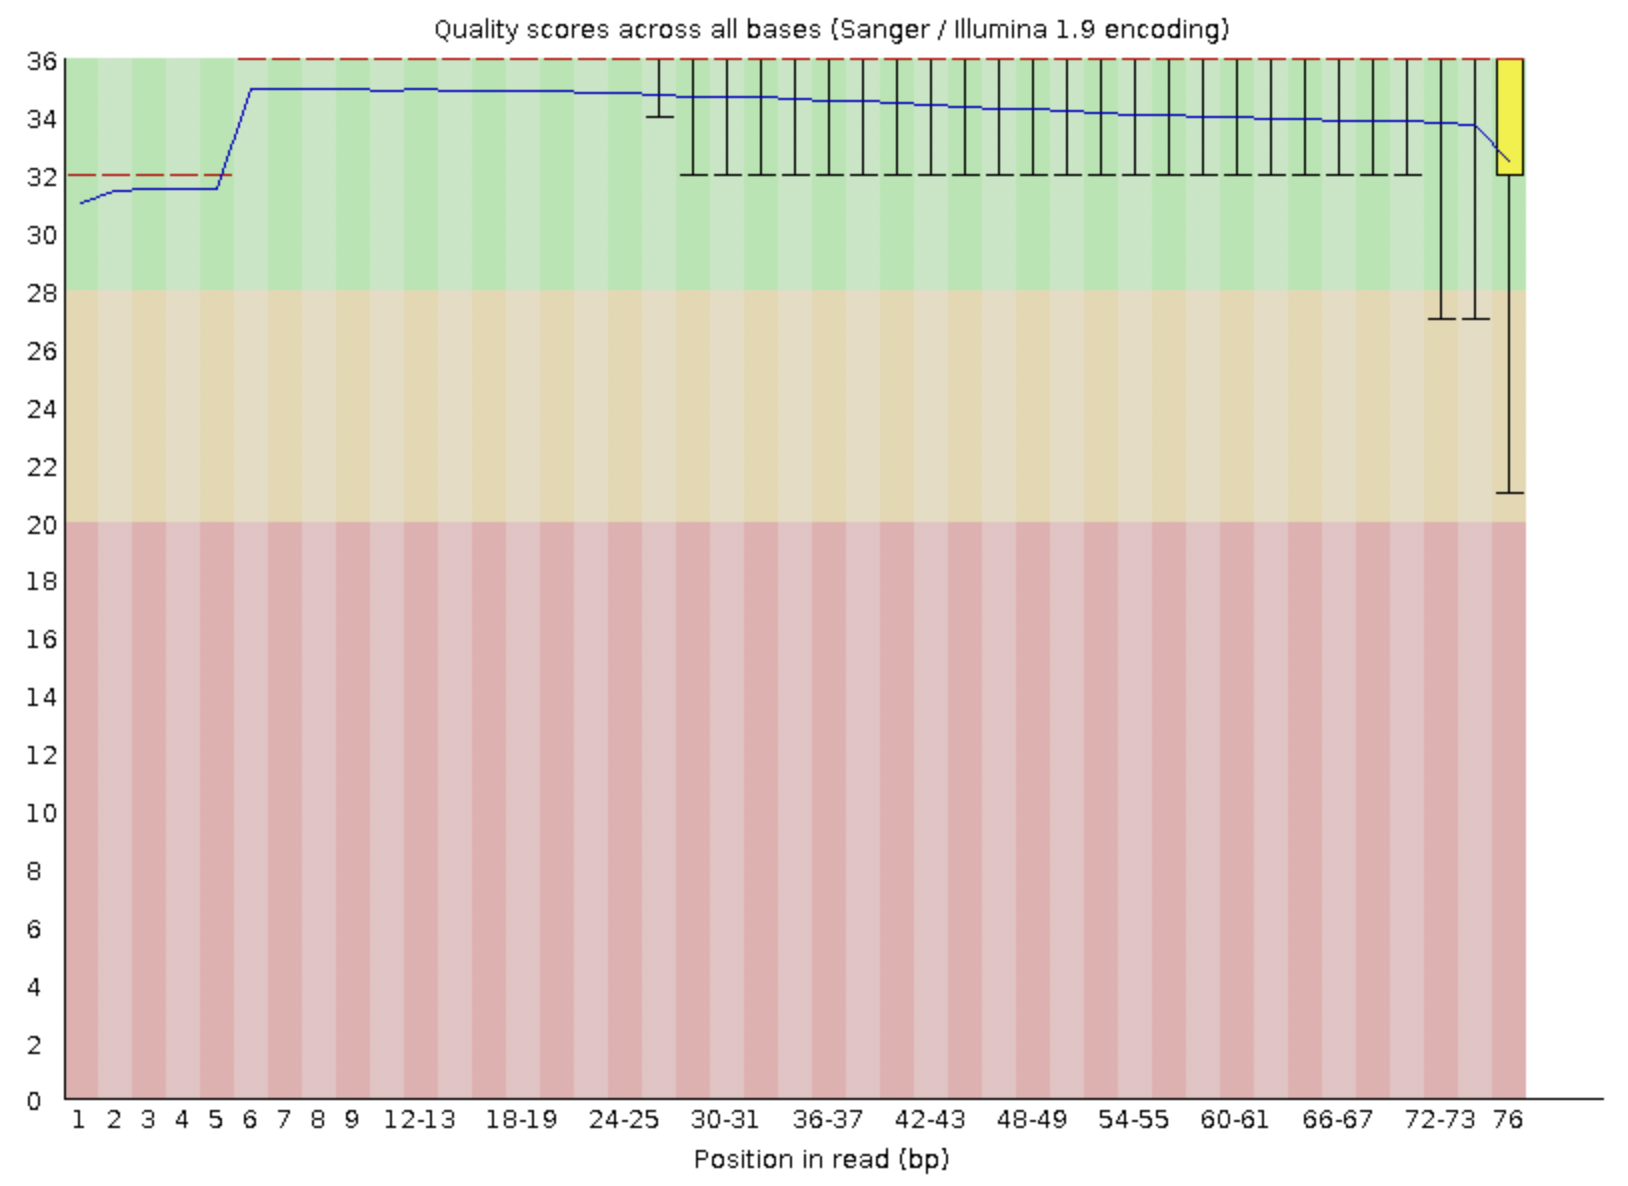
All the other fastq files also had good sequence quality (similar to this file).

**Trim fastq files:**  
Each fastq file contains 100 million+ reads. Just take the first 30 million reads (to make it manageable).

In [7]:
mkdir trimmed_fastq_files

In [ ]:
zcat fastq_files_control/SRR16609725_1.fastq.gz \
        | head -n 120000000 \
        | gzip > trimmed_fastq_files/SRR16609725_1_trimmed.fastq.gz

#done

In [3]:
zcat trimmed_fastq_files/SRR16609725_1_trimmed.fastq.gz | wc -l

120000000


In [ ]:
zcat fastq_files_control/SRR16609725_2.fastq.gz \
        | head -n 120000000 \
        | gzip > trimmed_fastq_files/SRR16609725_2_trimmed.fastq.gz

#done

In [ ]:
zcat fastq_files_SCZ/SRR16609727_1.fastq.gz \
        | head -n 120000000 \
        | gzip > trimmed_fastq_files/SRR16609727_1_trimmed.fastq.gz

#done

In [ ]:
zcat fastq_files_SCZ/SRR16609727_2.fastq.gz \
        | head -n 120000000 \
        | gzip > trimmed_fastq_files/SRR16609727_2_trimmed.fastq.gz

# Step 2: Alignment of ChIP-seq reads (to hg38) with bowtie2

In [7]:
ls -l /mnt/storage/data/resources/hg38

total 7703376
-rw-rw-r-- 1 u0079808 teachers 1020663364 Jul 17  2018 hg38.1.bt2
-rw-rw-r-- 1 u0079808 teachers  762328952 Jul 17  2018 hg38.2.bt2
-rw-rw-r-- 1 u0079808 teachers      15065 Jul 17  2018 hg38.3.bt2
-rw-rw-r-- 1 u0079808 teachers  762328946 Jul 17  2018 hg38.4.bt2
-rw-rw-r-- 1 u0079808 teachers      11672 Oct 19  2016 hg38.chrom.sizes
-rw-rw-r-- 1 u0079808 teachers 3273481150 Jan 16  2014 hg38.fa
-rw-rw-r-- 1 u0079808 teachers      19381 Nov 29  2016 hg38.fa.fai
-rw-r--r-- 1 u0079808 teachers  286394748 Jan 10  2020 hg38.refGene.gtf
-rw-rw-r-- 1 u0079808 teachers 1020663364 Jul 17  2018 hg38.rev.1.bt2
-rw-rw-r-- 1 u0079808 teachers  762328952 Jul 17  2018 hg38.rev.2.bt2
drwxrwsr-x 2 u0079808 teachers       4096 Oct  6  2020 STAR


In [9]:
ls -l trimmed_fastq_files

total 5628036
-rw-r--r-- 1 r0911921 domain users     798568 Dec 27 10:45 SRR16609725_1_trimmed_fastqc.html
-rw-r--r-- 1 r0911921 domain users     481842 Dec 27 10:45 SRR16609725_1_trimmed_fastqc.zip
-rw-r--r-- 1 r0911921 domain users 1443367639 Dec 27 09:53 SRR16609725_1_trimmed.fastq.gz
-rw-r--r-- 1 r0911921 domain users 1447140053 Dec 27 10:09 SRR16609725_2_trimmed.fastq.gz
-rw-r--r-- 1 r0911921 domain users 1438775398 Dec 27 10:21 SRR16609727_1_trimmed.fastq.gz
-rw-r--r-- 1 r0911921 domain users 1432523990 Dec 27 10:38 SRR16609727_2_trimmed.fastq.gz


**Align the control fastq to the reference genome:**

In [10]:
bowtie2 -p 8 \
        -x /mnt/storage/data/resources/hg38/hg38 \
        -1 trimmed_fastq_files/SRR16609725_1_trimmed.fastq.gz \
        -2 trimmed_fastq_files/SRR16609725_2_trimmed.fastq.gz \
        -S H3K4me1_control.sam

30000000 reads; of these:
  30000000 (100.00%) were paired; of these:
    774962 (2.58%) aligned concordantly 0 times
    24732543 (82.44%) aligned concordantly exactly 1 time
    4492495 (14.97%) aligned concordantly >1 times
    ----
    774962 pairs aligned concordantly 0 times; of these:
      38100 (4.92%) aligned discordantly 1 time
    ----
    736862 pairs aligned 0 times concordantly or discordantly; of these:
      1473724 mates make up the pairs; of these:
        1045598 (70.95%) aligned 0 times
        218336 (14.82%) aligned exactly 1 time
        209790 (14.24%) aligned >1 times
98.26% overall alignment rate


**Align the schizophrenia fastq to the reference genome:**

In [15]:
bowtie2 -p 8 \
        -x /mnt/storage/data/resources/hg38/hg38 \
        -1 trimmed_fastq_files/SRR16609727_1_trimmed.fastq.gz \
        -2 trimmed_fastq_files/SRR16609727_2_trimmed.fastq.gz \
        -S H3K4me1_schizophrenia.sam

30000000 reads; of these:
  30000000 (100.00%) were paired; of these:
    775147 (2.58%) aligned concordantly 0 times
    24871126 (82.90%) aligned concordantly exactly 1 time
    4353727 (14.51%) aligned concordantly >1 times
    ----
    775147 pairs aligned concordantly 0 times; of these:
      41375 (5.34%) aligned discordantly 1 time
    ----
    733772 pairs aligned 0 times concordantly or discordantly; of these:
      1467544 mates make up the pairs; of these:
        1031096 (70.26%) aligned 0 times
        229929 (15.67%) aligned exactly 1 time
        206519 (14.07%) aligned >1 times
98.28% overall alignment rate


**Check a couple of lines in the SAM file:**

In [11]:
head -500 H3K4me1_control.sam | tail -5

SRR16609725.20	99	chr2	174195364	42	76M	=	174195487	199	AACTANCCTTGTACCAACTGAAGTCTCAGGGACAGATGCACTGATTAGAGACTTCAACAACATAACTCATGCTGTC	AAAAA#AEEEEE/AAEEE/EEEEEEEEEEEEEAEEEEEEEEEEEEEEEAEEEEEEEEEEEEE/E/EEEEEEEE<AE	AS:i:-1	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:5T70	YS:i:0	YT:Z:CP
SRR16609725.20	147	chr2	174195487	42	76M	=	174195364	-199	ATTTACTTATATACTAATGTCCACTACATTATACTGCTCACATCAAAGCAACCAAGCAGTGAAAAAGAAATGCCAA	EEEEEEEEEEEAAEEEEEEEEEEAAEE/EEAE<EEEEE/EEEEEEEEAEEEEEEEEEEEEEEEEEEEEEAEAAAAA	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:76	YS:i:-1	YT:Z:CP
SRR16609725.21	83	chr15	101380690	42	76M	=	101380547	-219	CAACACACACTCTCTGCACTCCTACCATATGCGAGCCCTCCACCAGACACATTTTTCTCAACTATTTGTGNCAAGA	EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE#AAAAA	AS:i:-1	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:70G5	YS:i:0	YT:Z:CP
SRR16609725.21	163	chr15	101380547	42	75M	=	101380690	219	AGTCAAGACTGAGGCTTGTCAGGTGTCTGGCCGACCTGTCGGGGCCTGCAGTGACCACTCAGCGGTCAGTGTGCA	AAAAAEEEEEEAEEEEEEEEEEEEEEEEEE

In [16]:
head -500 H3K4me1_schizophrenia.sam | tail -5

SRR16609727.36	99	chr18	64272450	42	76M	=	64272563	187	AGGCANATAGCTTTCTCGCTGTCCAGCTCCCAGTTTTGCTAAGGTGCCCGCTTGGAAGGCACAAAGTACACCAGTG	/AAAA#EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEAEEEEEEEEEEEE/EEEEEEEEEAEEEEE	AS:i:-1	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:5C70	YS:i:-5	YT:Z:CP
SRR16609727.36	147	chr18	64272563	42	74M	=	64272450	-187	TATCCCCTCTCCCACTCTTTAAAAAAATACTATTATCTGATTATGAACAAAGAACCTTCTCTTTAATGCATCCT	EAEEEEE6EEEEE6EEEEE/EEEEEEAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEAAAAA	AS:i:-5	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:0C73	YS:i:-1	YT:Z:CP
SRR16609727.37	83	chr18	5482666	42	76M	=	5482562	-180	CAGAAAACCCACACAGGCCAGGAAAGAGTGGACTGACATTTTTAAAGTGCTCAAAGAAAAAAACTGTCATNTAAGA	AEA/<EEEEEE/A/E<</EEAEA//EEEA6EAEEE///EEEEEEEEEEE/EE<EAEEE/EE//EEEAEEE#AAAAA	AS:i:-1	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:70C5	YS:i:0	YT:Z:CP
SRR16609727.37	163	chr18	5482562	42	76M	=	5482666	180	CTCTCAAAGCTCAAGAACAAAGACAGAACCCTAAAAGCAGCAAGAGAAAAAGAAACAAATAACAGGTAAAGGAGCT	A/AAAEAEEEEEEEEEEEEEE/EEEEEEE<AEEEEEEEE

**Convert the SAM file to BAM format (binary):**

In [12]:
samtools view -S -b H3K4me1_control.sam > H3K4me1_control.bam

In [13]:
rm -r H3K4me1_control.sam

In [17]:
samtools view -S -b H3K4me1_schizophrenia.sam > H3K4me1_schizophrenia.bam

In [18]:
rm -r H3K4me1_schizophrenia.sam

**No of reads in the BAM file:**

In [19]:
samtools view -c H3K4me1_control.bam

60000000


In [20]:
samtools view -c H3K4me1_schizophrenia.bam

60000000


In [23]:
samtools flags UNMAP,SECONDARY

0x104	260	UNMAP,SECONDARY


**No of reads that are mapped and part of the primary alignment:**

In [24]:
samtools view -c -F 260 H3K4me1_control.bam

58954402


In [14]:
samtools view -c -F 260 H3K4me1_schizophrenia.bam

58435518


**Sort and index the BAM files:**

In [25]:
samtools sort -O bam -o H3K4me1_control.sorted.bam H3K4me1_control.bam

[bam_sort_core] merging from 18 files and 1 in-memory blocks...


In [27]:
samtools sort -O bam -o H3K4me1_schizophrenia.sorted.bam H3K4me1_schizophrenia.bam

[bam_sort_core] merging from 18 files and 1 in-memory blocks...


In [28]:
samtools index H3K4me1_control.sorted.bam

In [29]:
samtools index H3K4me1_schizophrenia.sorted.bam

**Check the mapping in IGV:**
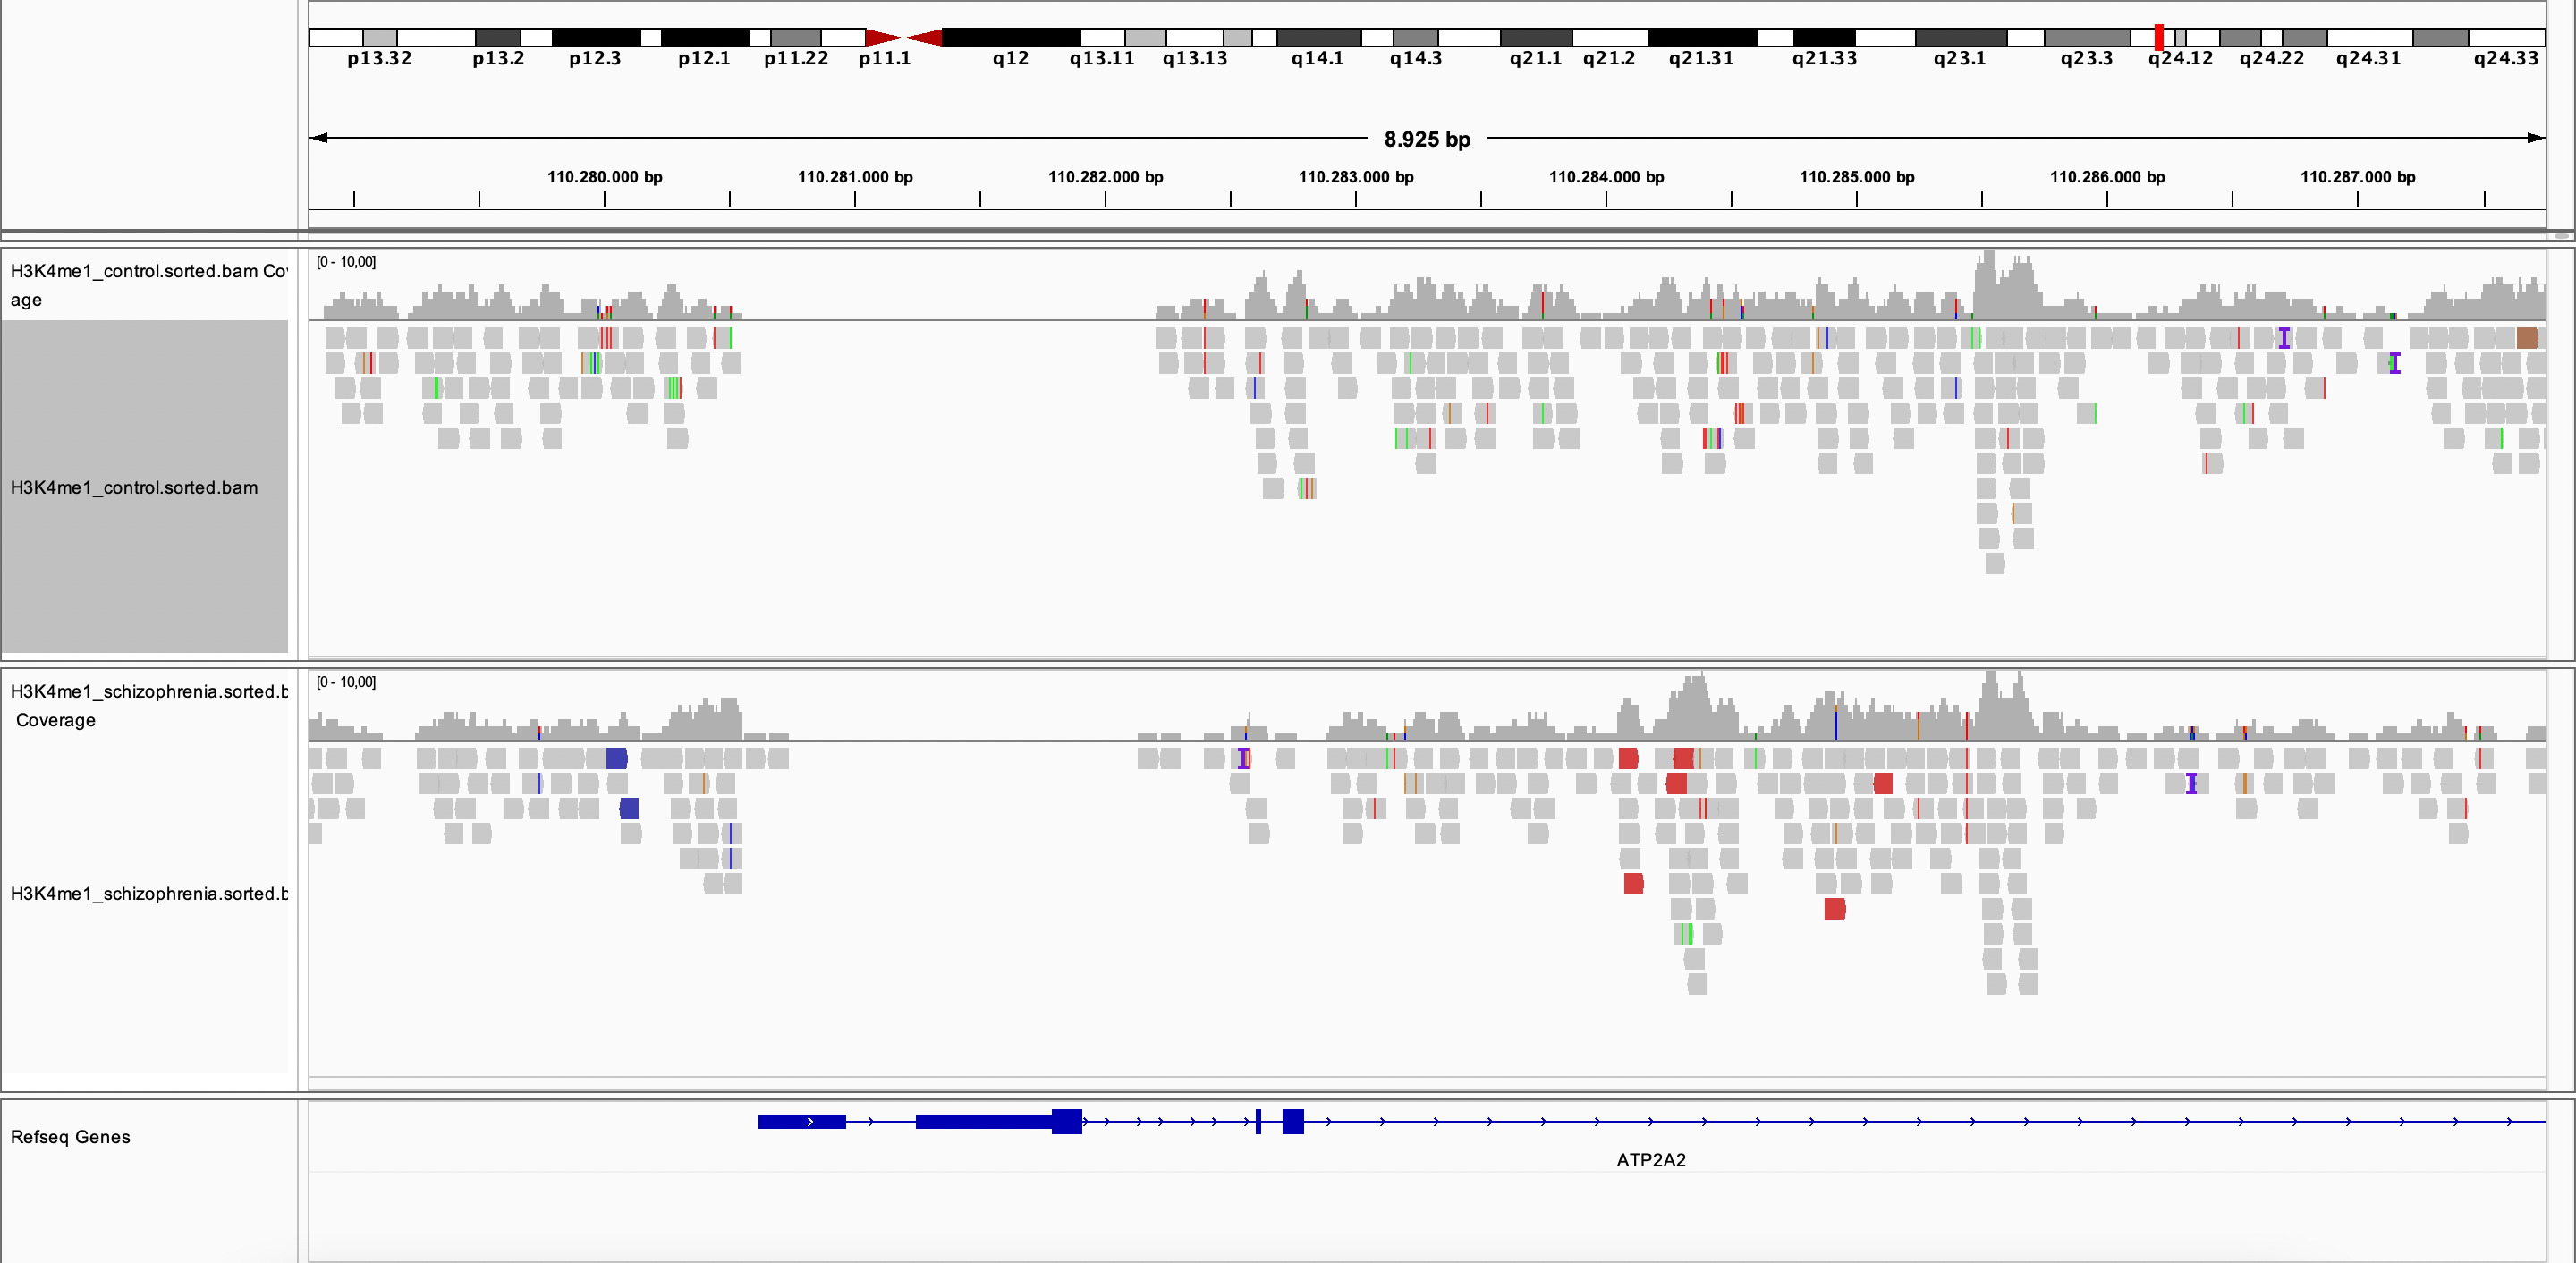
The authors of the reference paper hypothesized and eventually found that the SCZ GWAS loci regulate the expression of ATP2A2.  
In the IGV snippet above, **I am expecting less coverage for the schizophrenia peaks before or after the ATP2A2 promoter region**, as the regulation should be impaired in some sense. However, it's not clear here if there are any differences. The peaks are also generally broad and less defined since this is an analysis on histone modifications.

**Comparison of BAM files with BigWig files (obtained from ChIP-Atlas):**  
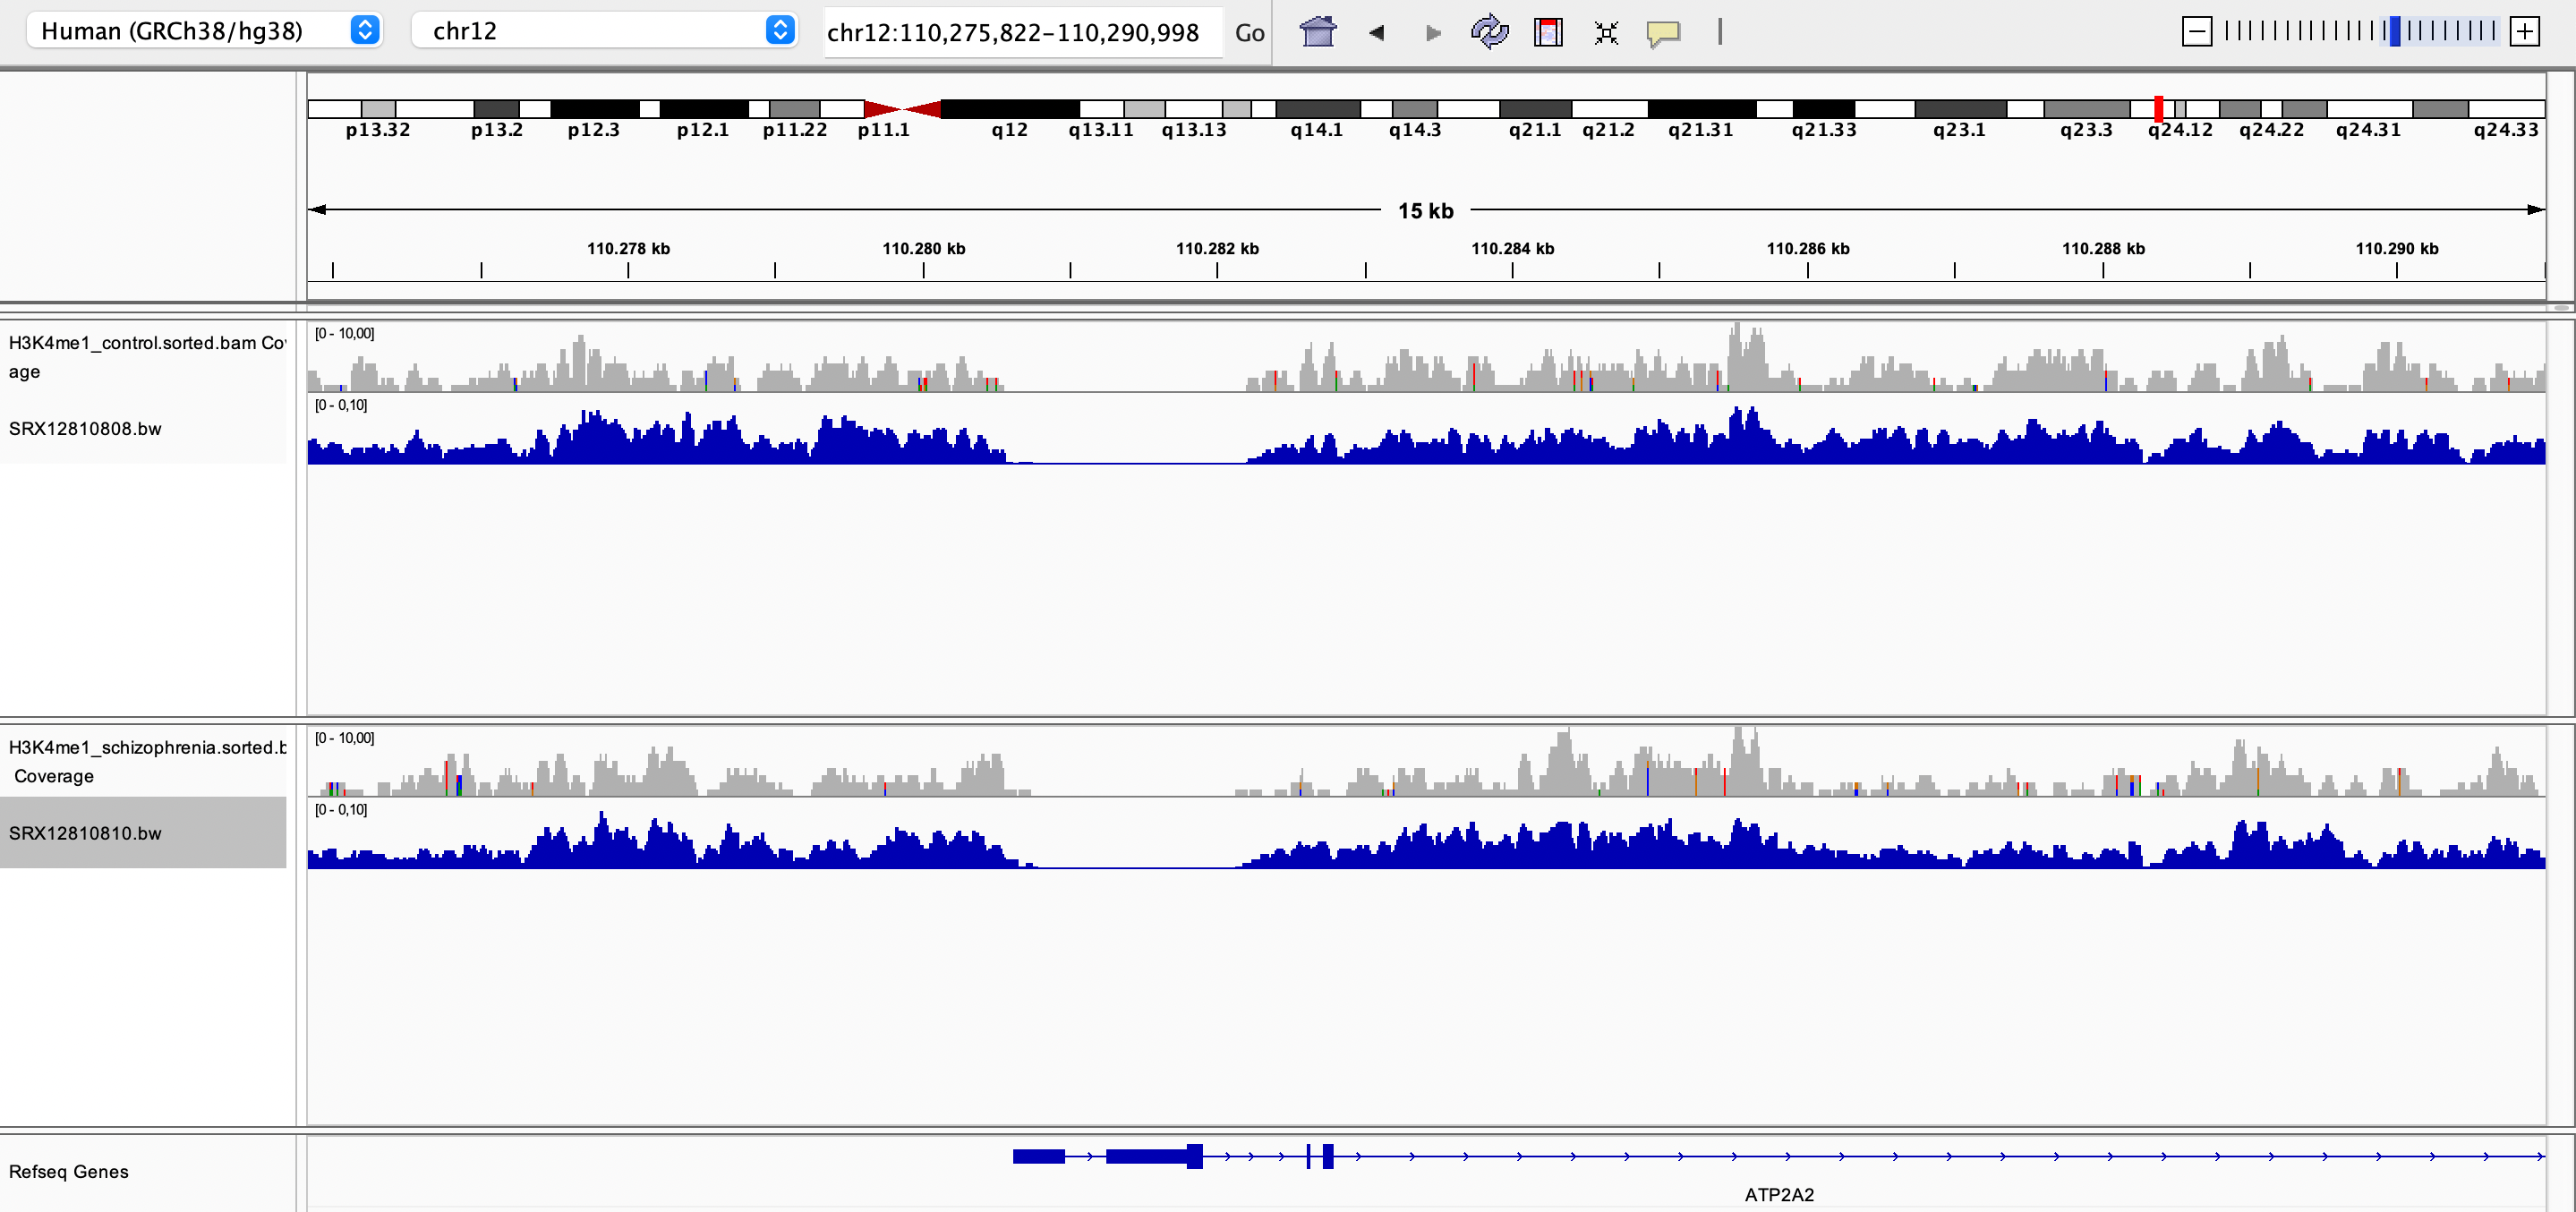
- Top track: Control (SRX12810808)
- Bottom track: Schizophrenia (SRX12810810)  
Blue peaks are from BigWig files.  

Peaks look roughly similar between the BAM and ChIP-atlas BigWig files.

# Step 3: Differential peak analysis (between control and schizophrenia)

**Predict fragment length for each BAM file (so we can extend at the same degree):**

In [4]:
macs2 predictd -i H3K4me1_control.sorted.bam

INFO  @ Tue, 02 Jan 2024 17:26:36: # read alignment files... 
INFO  @ Tue, 02 Jan 2024 17:26:36: # read treatment tags... 
INFO  @ Tue, 02 Jan 2024 17:26:36: Detected format is: BAM 
INFO  @ Tue, 02 Jan 2024 17:26:36: * Input file is gzipped. 
INFO  @ Tue, 02 Jan 2024 17:26:41:  1000000 
INFO  @ Tue, 02 Jan 2024 17:26:46:  2000000 
INFO  @ Tue, 02 Jan 2024 17:26:50:  3000000 
INFO  @ Tue, 02 Jan 2024 17:26:55:  4000000 
INFO  @ Tue, 02 Jan 2024 17:26:59:  5000000 
INFO  @ Tue, 02 Jan 2024 17:27:04:  6000000 
INFO  @ Tue, 02 Jan 2024 17:27:09:  7000000 
INFO  @ Tue, 02 Jan 2024 17:27:13:  8000000 
INFO  @ Tue, 02 Jan 2024 17:27:18:  9000000 
INFO  @ Tue, 02 Jan 2024 17:27:22:  10000000 
INFO  @ Tue, 02 Jan 2024 17:27:27:  11000000 
INFO  @ Tue, 02 Jan 2024 17:27:31:  12000000 
INFO  @ Tue, 02 Jan 2024 17:27:36:  13000000 
INFO  @ Tue, 02 Jan 2024 17:27:41:  14000000 
INFO  @ Tue, 02 Jan 2024 17:27:45:  15000000 
INFO  @ Tue, 02 Jan 2024 17:27:50:  16000000 
INFO  @ Tue, 02 Jan 2024 17:2

In [5]:
macs2 predictd -i H3K4me1_schizophrenia.sorted.bam

INFO  @ Tue, 02 Jan 2024 17:34:46: # read alignment files... 
INFO  @ Tue, 02 Jan 2024 17:34:46: # read treatment tags... 
INFO  @ Tue, 02 Jan 2024 17:34:46: Detected format is: BAM 
INFO  @ Tue, 02 Jan 2024 17:34:46: * Input file is gzipped. 
INFO  @ Tue, 02 Jan 2024 17:34:50:  1000000 
INFO  @ Tue, 02 Jan 2024 17:34:55:  2000000 
INFO  @ Tue, 02 Jan 2024 17:35:00:  3000000 
INFO  @ Tue, 02 Jan 2024 17:35:04:  4000000 
INFO  @ Tue, 02 Jan 2024 17:35:09:  5000000 
INFO  @ Tue, 02 Jan 2024 17:35:13:  6000000 
INFO  @ Tue, 02 Jan 2024 17:35:18:  7000000 
INFO  @ Tue, 02 Jan 2024 17:35:23:  8000000 
INFO  @ Tue, 02 Jan 2024 17:35:27:  9000000 
INFO  @ Tue, 02 Jan 2024 17:35:32:  10000000 
INFO  @ Tue, 02 Jan 2024 17:35:36:  11000000 
INFO  @ Tue, 02 Jan 2024 17:35:41:  12000000 
INFO  @ Tue, 02 Jan 2024 17:35:45:  13000000 
INFO  @ Tue, 02 Jan 2024 17:35:50:  14000000 
INFO  @ Tue, 02 Jan 2024 17:35:55:  15000000 
INFO  @ Tue, 02 Jan 2024 17:35:59:  16000000 
INFO  @ Tue, 02 Jan 2024 17:3

Predicted fragment sizes are 180bp and 174bp. Now we can create the BedGraph files using macs2 callpeak -B and extsize ~ fragment length (around 177).

**Create the BedGraph files using "macs2 callpeak -B" and extsize ~ fragment length (around 177). "-f BAMPE" option is also used to indicate paired-end BAM as the input:**

In [4]:
macs2 callpeak -f BAMPE -B -t H3K4me1_control.sorted.bam -n control --nomodel --extsize 177

INFO  @ Tue, 02 Jan 2024 17:56:21: 
# Command line: callpeak -f BAMPE -B -t H3K4me1_control.sorted.bam -n control --nomodel --extsize 177
# ARGUMENTS LIST:
# name = control
# format = BAMPE
# ChIP-seq file = ['H3K4me1_control.sorted.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is on
 
INFO  @ Tue, 02 Jan 2024 17:56:21: #1 read fragment files... 
INFO  @ Tue, 02 Jan 2024 17:56:21: #1 read treatment fragments... 
INFO  @ Tue, 02 Jan 2024 17:56:32:  1000000 
INFO  @ Tue, 02 Jan 2024 17:56:41:  2000000 
INFO  @ Tue, 02 Jan 2024 17:56:49:  3000000 
INFO  @ Tue, 02 Jan 2024 17:56:59:  400

In [4]:
macs2 callpeak -f BAMPE -B -t H3K4me1_schizophrenia.sorted.bam -n schizophrenia --nomodel --extsize 177

INFO  @ Tue, 02 Jan 2024 22:01:39: 
# Command line: callpeak -f BAMPE -B -t H3K4me1_schizophrenia.sorted.bam -n schizophrenia --nomodel --extsize 177
# ARGUMENTS LIST:
# name = schizophrenia
# format = BAMPE
# ChIP-seq file = ['H3K4me1_schizophrenia.sorted.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is on
 
INFO  @ Tue, 02 Jan 2024 22:01:39: #1 read fragment files... 
INFO  @ Tue, 02 Jan 2024 22:01:39: #1 read treatment fragments... 
INFO  @ Tue, 02 Jan 2024 22:01:49:  1000000 
INFO  @ Tue, 02 Jan 2024 22:02:00:  2000000 
INFO  @ Tue, 02 Jan 2024 22:02:10:  3000000 
INFO  @ Tue, 02

**Try using --broad option for broad peak calling:**  
Histone modifications can have broad peaks, which makes it more difficult to detect and conclude differential peaks.

In [9]:
macs2 callpeak --broad -f BAMPE -B -t H3K4me1_control.sorted.bam -n control_broad --nomodel --extsize 177

INFO  @ Wed, 03 Jan 2024 18:27:40: 
# Command line: callpeak --broad -f BAMPE -B -t H3K4me1_control.sorted.bam -n control_broad --nomodel --extsize 177
# ARGUMENTS LIST:
# name = control_broad
# format = BAMPE
# ChIP-seq file = ['H3K4me1_control.sorted.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff for narrow/strong regions = 5.00e-02
# qvalue cutoff for broad/weak regions = 1.00e-01
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is on
# Paired-End mode is on
 
INFO  @ Wed, 03 Jan 2024 18:27:40: #1 read fragment files... 
INFO  @ Wed, 03 Jan 2024 18:27:40: #1 read treatment fragments... 
INFO  @ Wed, 03 Jan 2024 18:27:51:  1000000 
INFO  @ Wed, 03 Jan 2024 18:28:01:

In [3]:
macs2 callpeak --broad -f BAMPE -B -t H3K4me1_schizophrenia.sorted.bam -n schizophrenia_broad --nomodel --extsize 177

INFO  @ Wed, 03 Jan 2024 22:41:28: 
# Command line: callpeak --broad -f BAMPE -B -t H3K4me1_schizophrenia.sorted.bam -n schizophrenia_broad --nomodel --extsize 177
# ARGUMENTS LIST:
# name = schizophrenia_broad
# format = BAMPE
# ChIP-seq file = ['H3K4me1_schizophrenia.sorted.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff for narrow/strong regions = 5.00e-02
# qvalue cutoff for broad/weak regions = 1.00e-01
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is on
# Paired-End mode is on
 
INFO  @ Wed, 03 Jan 2024 22:41:28: #1 read fragment files... 
INFO  @ Wed, 03 Jan 2024 22:41:28: #1 read treatment fragments... 
INFO  @ Wed, 03 Jan 2024 22:41:40:  1000000 
INFO  @ We

In [6]:
egrep "fragments after filtering in treatment" control_peaks.xls

# fragments after filtering in treatment: 28388762


In [7]:
egrep "fragments after filtering in treatment" schizophrenia_peaks.xls

# fragments after filtering in treatment: 28380562


In [9]:
egrep "fragments after filtering in treatment" control_broad_peaks.xls

# fragments after filtering in treatment: 28388762


In [10]:
egrep "fragments after filtering in treatment" schizophrenia_broad_peaks.xls

# fragments after filtering in treatment: 28380562


In [13]:
ls -lt *.bdg

-rw-r--r-- 1 r0911921 domain users 1276256664 Jan  4 02:15 schizophrenia_broad_control_lambda.bdg
-rw-r--r-- 1 r0911921 domain users 1749630069 Jan  4 02:15 schizophrenia_broad_treat_pileup.bdg
-rw-r--r-- 1 r0911921 domain users 1247528710 Jan  3 22:26 control_broad_control_lambda.bdg
-rw-r--r-- 1 r0911921 domain users 1750448031 Jan  3 22:26 control_broad_treat_pileup.bdg
-rw-r--r-- 1 r0911921 domain users 1276256664 Jan  3 01:35 schizophrenia_control_lambda.bdg
-rw-r--r-- 1 r0911921 domain users 1749630069 Jan  3 01:35 schizophrenia_treat_pileup.bdg
-rw-r--r-- 1 r0911921 domain users 1247528710 Jan  2 21:47 control_control_lambda.bdg
-rw-r--r-- 1 r0911921 domain users 1750448031 Jan  2 21:47 control_treat_pileup.bdg


**Perform the differential analysis:**

In [4]:
# narrow peaks
macs2 bdgdiff \
    --t1 control_treat_pileup.bdg \
    --c1 control_control_lambda.bdg \
    --t2 schizophrenia_treat_pileup.bdg \
    --c2 schizophrenia_control_lambda.bdg \
    --d1 28388762 \
    --d2 28380562 \
    -g 60 \
    -l 120 \
    --o-prefix diff_control_vs_schizophrenia

INFO  @ Wed, 03 Jan 2024 15:41:33: Read and build treatment 1 bedGraph... 
INFO  @ Wed, 03 Jan 2024 15:43:29: Read and build control 1 bedGraph... 
INFO  @ Wed, 03 Jan 2024 15:46:52: Read and build control 2 bedGraph... 
INFO  @ Wed, 03 Jan 2024 15:58:55: Write peaks... 
INFO  @ Wed, 03 Jan 2024 15:58:55: Done 


In [11]:
# broad peaks
macs2 bdgdiff \
    --t1 control_broad_treat_pileup.bdg \
    --c1 control_broad_control_lambda.bdg \
    --t2 schizophrenia_broad_treat_pileup.bdg \
    --c2 schizophrenia_broad_control_lambda.bdg \
    --d1 28388762 \
    --d2 28380562 \
    -g 60 \
    -l 120 \
    --o-prefix diff_control_vs_schizophrenia_broad

INFO  @ Thu, 04 Jan 2024 12:04:18: Read and build treatment 1 bedGraph... 
INFO  @ Thu, 04 Jan 2024 12:06:19: Read and build control 1 bedGraph... 
INFO  @ Thu, 04 Jan 2024 12:07:47: Read and build treatment 2 bedGraph... 
INFO  @ Thu, 04 Jan 2024 12:21:29: Write peaks... 
INFO  @ Thu, 04 Jan 2024 12:21:29: Done 


In [14]:
ls -lt *.bed | head

-rw-r--r-- 1 r0911921 domain users 122037 Jan  4 12:21 diff_control_vs_schizophrenia_broad_c3.0_common.bed
-rw-r--r-- 1 r0911921 domain users  61306 Jan  4 12:21 diff_control_vs_schizophrenia_broad_c3.0_cond2.bed
-rw-r--r-- 1 r0911921 domain users 146327 Jan  4 12:21 diff_control_vs_schizophrenia_broad_c3.0_cond1.bed
-rw-r--r-- 1 r0911921 domain users 112935 Jan  3 15:58 diff_control_vs_schizophrenia_c3.0_common.bed
-rw-r--r-- 1 r0911921 domain users  56620 Jan  3 15:58 diff_control_vs_schizophrenia_c3.0_cond2.bed
-rw-r--r-- 1 r0911921 domain users 135251 Jan  3 15:58 diff_control_vs_schizophrenia_c3.0_cond1.bed
-rw-r--r-- 1 r0911921 domain users 107669 Jan  3 01:35 schizophrenia_summits.bed
-rw-r--r-- 1 r0911921 domain users 123405 Jan  2 21:47 control_summits.bed


- **cond1** --> peaks that are enriched in only control
- **cond2** --> peaks that are enriched in only schizophrenia
- **common** --> peaks that are enriched in both conditions

**Difference between narrow peak and broad peak calling:**
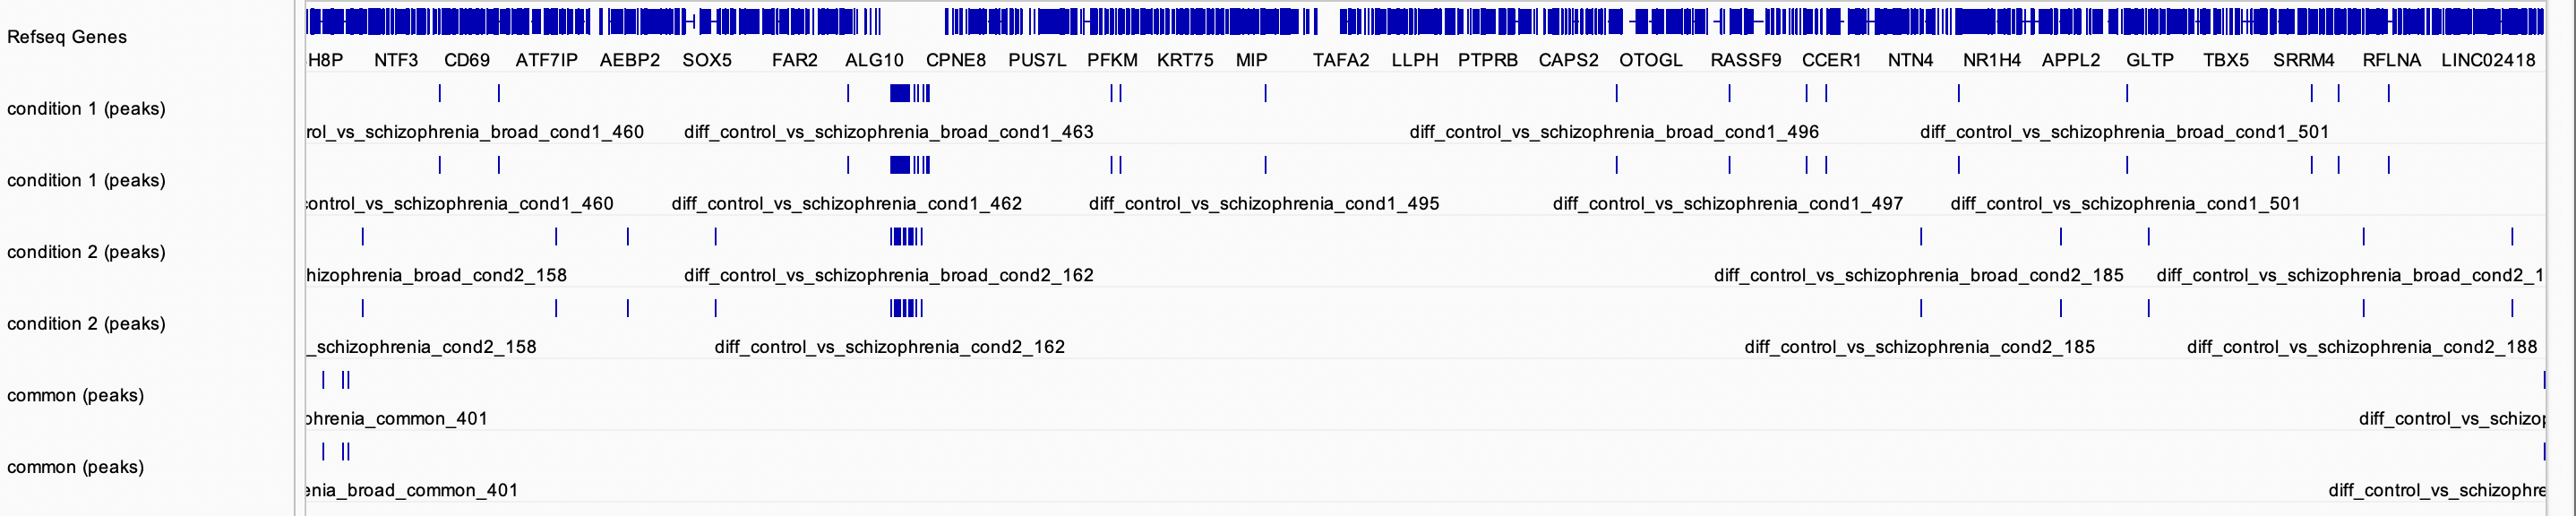
The above image show all the differential peaks for chromosome 12. The intervals labeled with "broad" signify peaks that are called using broad peak calling.  
It turns out that there is no difference between the narrow and broad peak calling. This is likely because I need to set the parameters manually to make sure that I get the proper broad peaks.

**Peaks around the ATP2A2 gene:**
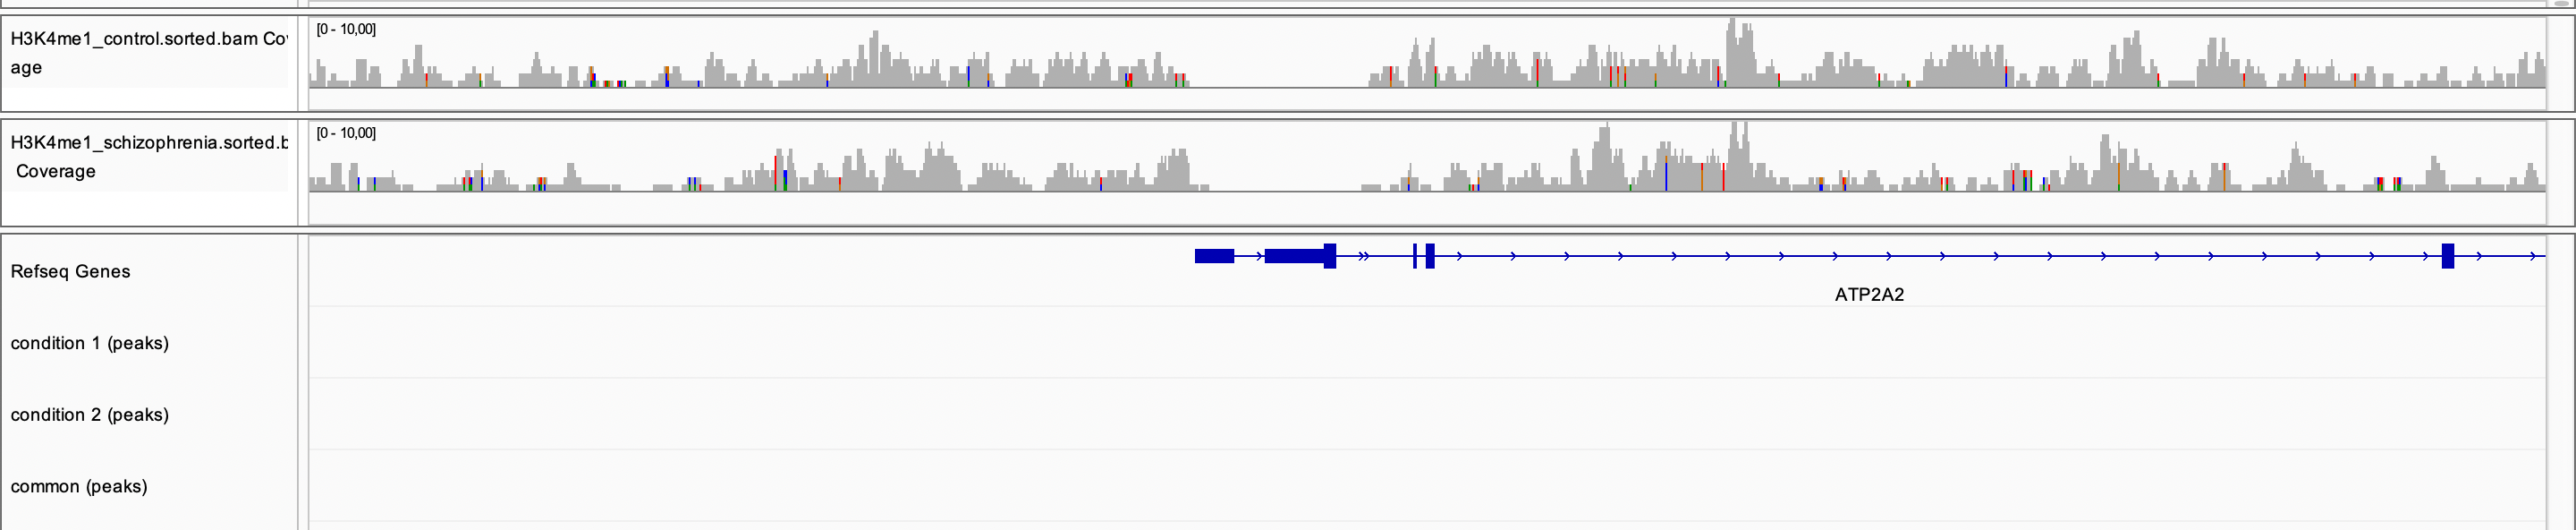
There are no differential peaks enriched near the ATP2A2 gene. There are also even no peaks detected that are common to both control and schizophrenia.  
The authors of the reference paper did eventually confirm experimentally that the schizophrenia risk loci regulate ATP2A2 expression. It might be the case that the histone modification H3K4me1 is just not a clear indicator for the regulation of ATP2A2 expression.

# Step 4: Functional analysis

For the functional analysis, I will just proceed with the peaks that I have and see whether there are any motifs enriched.

I will check the **diff_control_vs_schizophrenia_c3.0_cond1.bed** file to see which peaks are only in the control --> see which regions are downregulated in schizophrenia.

Use the bed file as input to [i-cisTarget](https://gbiomed.kuleuven.be/apps/lcb/i-cisTarget/) for motif discovery.

In [7]:
cat diff_control_vs_schizophrenia_c3.0_cond1.bed | sort -k 5 -gr | head

chr1	124098773	124099170	diff_control_vs_schizophrenia_cond1_124	362.88205
chr5	48904702	48905109	diff_control_vs_schizophrenia_cond1_1461	320.70511
chr19	26504208	26504615	diff_control_vs_schizophrenia_cond1_911	311.35425
chr4	189233614	189234695	diff_control_vs_schizophrenia_cond1_1346	131.49612
chr4	189234975	189235442	diff_control_vs_schizophrenia_cond1_1347	131.08250
chr19	25254340	25254584	diff_control_vs_schizophrenia_cond1_835	87.87146
chr7	59251618	59251844	diff_control_vs_schizophrenia_cond1_1595	85.59426
chr7	60418753	60419075	diff_control_vs_schizophrenia_cond1_1618	84.34546
chr11	53354000	53354228	diff_control_vs_schizophrenia_cond1_434	83.81685
chr14	17459752	17460004	diff_control_vs_schizophrenia_cond1_639	79.75958
sort: write failed: 'standard output': Broken pipe
sort: write error


**i-cisTarget report (H3K4me1 control peaks):** https://gbiomed.kuleuven.be/apps/lcb/i-cisTarget/reports/92293400cd883f79d0205be7d77ccce44359cd31/report.html 

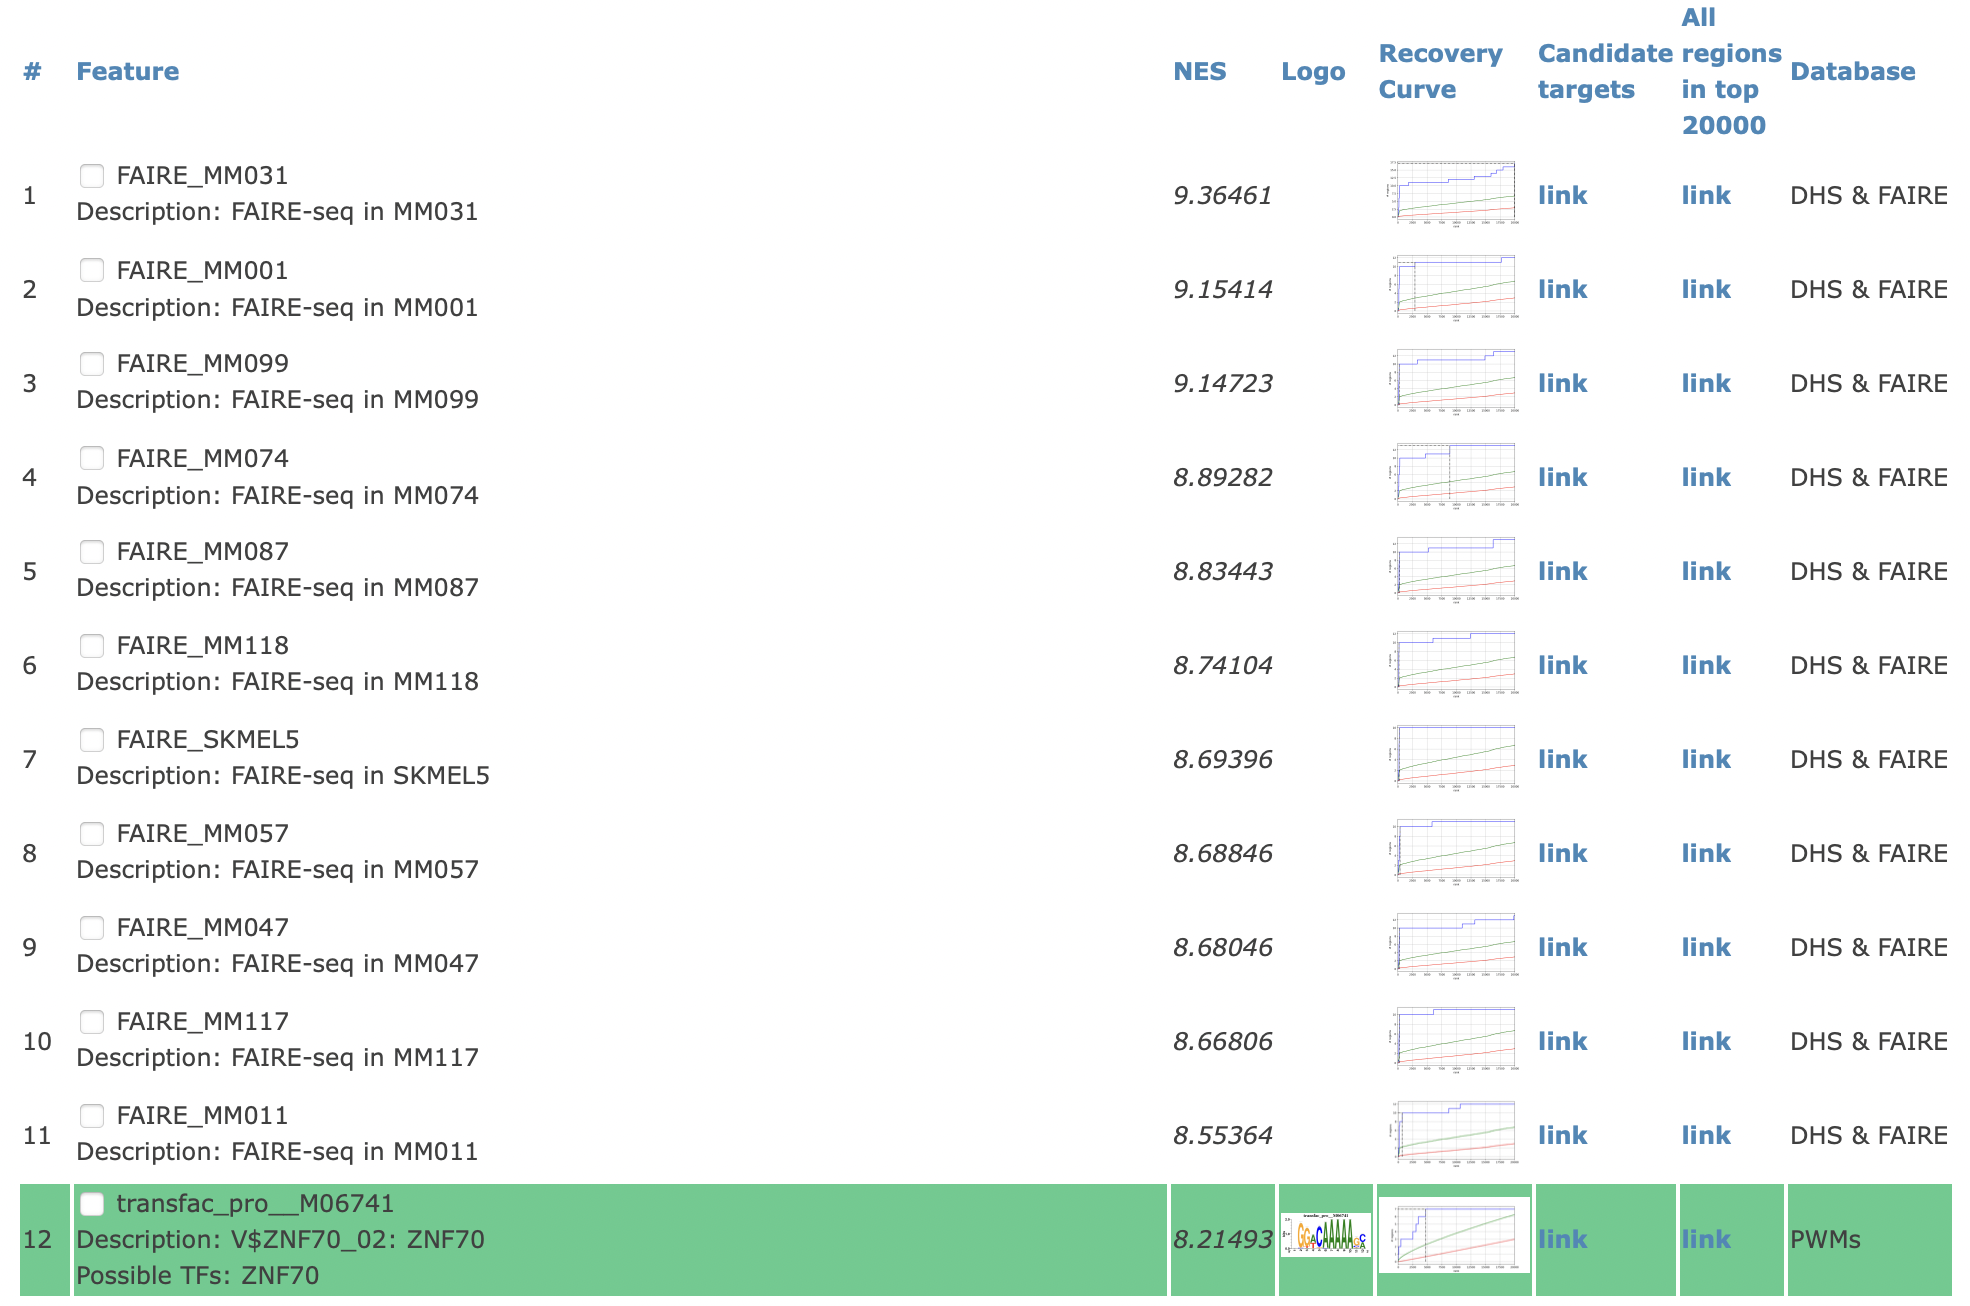

**Significantly high ranked regions for feature #1 (FAIRE_MM031):**
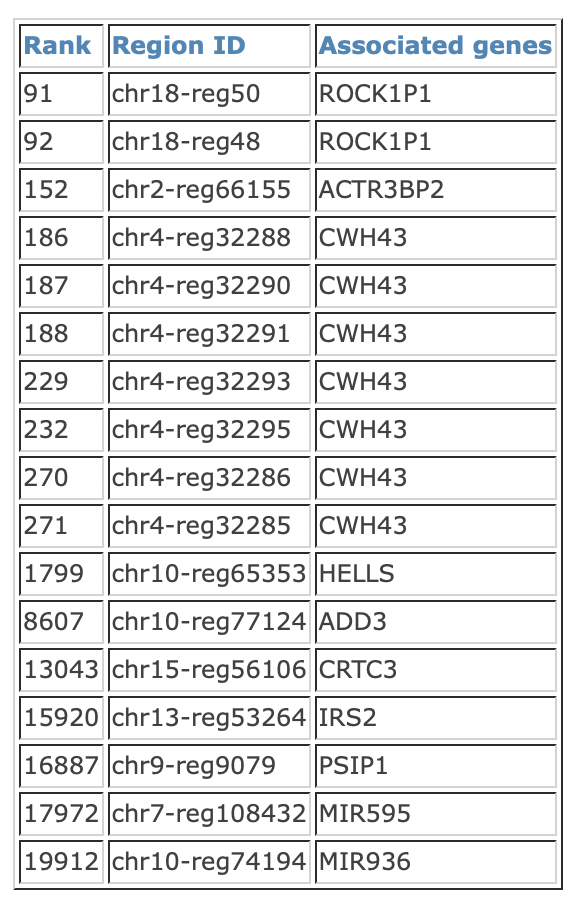

**IGV track for the ROCK1P1 gene:**
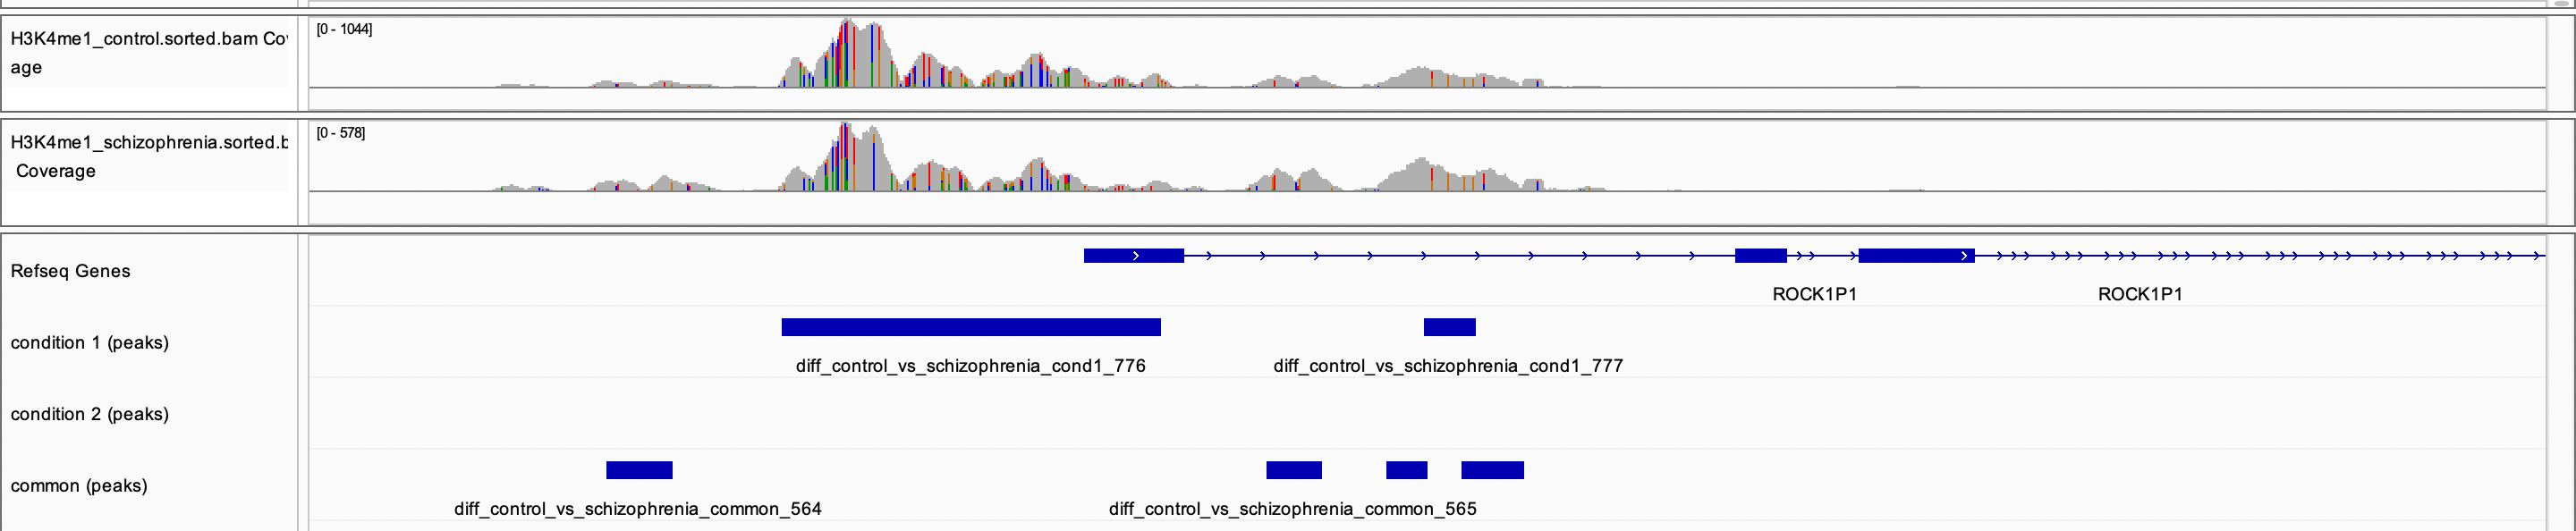

**IGV track for the CWH43 gene:**
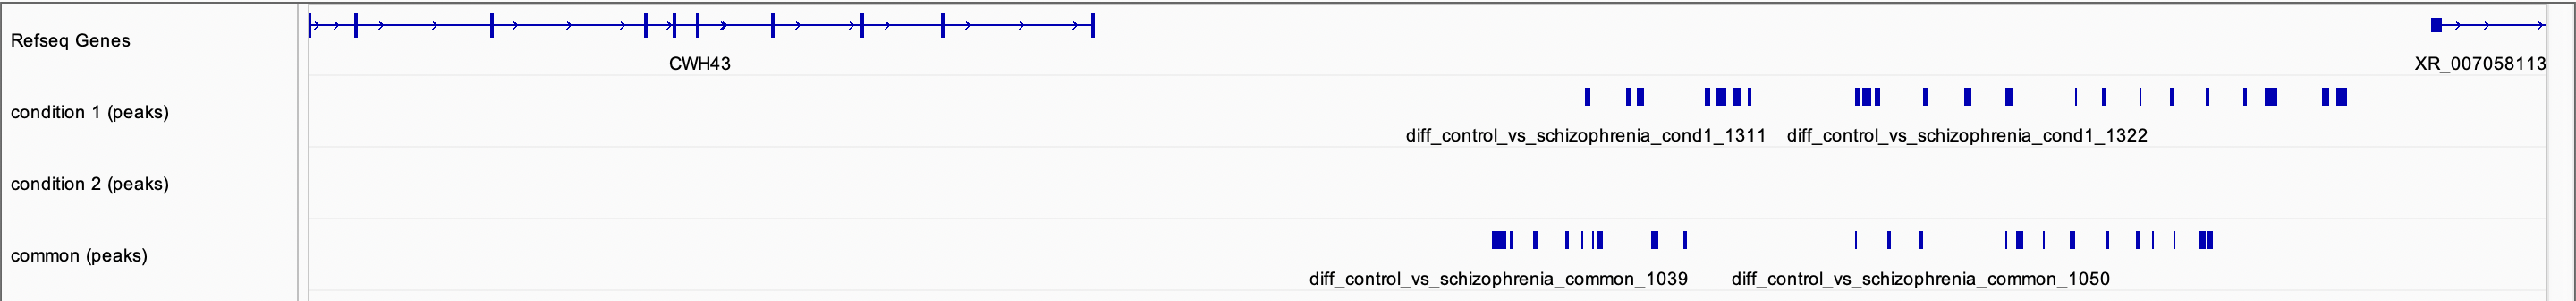

It seems like some common and control peaks are enriched in between each other.  

For other genes (ACTR3BP2, HELLS, ADD3, etc.) and also genes in other features, there are no enriched peaks for any of the tracks.

The authors of the reference paper found that ATP2A2 expression regulates the PKC pathway. However, none of the genes found through iCisTarget are implicated in the PKC pathway.